# Life Expectancy Prediction using Multiple Linear Regression

<h2>Introduction</h2>

Linear regression is one of types supervised machine learning algorithms which predict continuous value outputs. e.g: house price, car price, medical cost, etc.<br>
Term of linear regression refers to relationship between two or more variable, where 'x' is variable predictor as independent variable and 'y' is variable target as dependent variable. Relationship between two variable called Simple Linear Regression, whilst relationship between more than two variable called Multiple Linear Regression. <br>
<h4>Simple Linear Regression</h4>
If we transform linerity relationship between two variable 'x' and 'y' into plot visualization, it will be shown as below :<br>
<img src="linearRegression.png" width="500" /><br>
Equation from the above line is:<br>
<img src="simple.JPG" width="150"/><br>
Where 'b' is the intercept (indicates the location where it intersects an axis) and 'm' is the slope (indicates the steepness of a line). Basically, linear regression algorithm gives us the most optimal value for the intercept and the slope.<br>
<h4>Multiple Linear Regression</h4>
If simple linear regression only involving two variable, then multiple linear regression involves more that two variable. For example in this notebook, I will present multiple linear regression model which predict life expectancy based on income, death ratio, education, etc. Equation from multiple linear regression is :<br>
<img src="multiple.JPG" width="500"/><br>
In this case, the dependent variable(target variable) is dependent upon several independent variables.

<h2>Data Preparation</h2>

<h4>Import library</h4>

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.mstats import winsorize
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<h4>Read the data</h4>

In [2]:
data = pd.read_csv('Life Expectancy Data.csv')

In [3]:
data.shape

(2938, 22)

In [4]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
data[['Country','Status']] = data[['Country','Status']].astype('category')

In [7]:
data['Country'].nunique()

193

<h4>Remove variable 'country'</h4><br>
Since variable country have many unique value, we need to drop those variable.

In [8]:
data.drop(['Country'], axis=1, inplace=True)

<h4>Renaming Columns</h4>

In [9]:
#rename column
orig_cols = list(data.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
data.columns = new_cols

In [10]:
data.rename(columns={'thinness_1-19_years':'thin_1','thinness_5-9_years':'thin_5','hiv/aids':'hivaids','under-five_deaths':\
                    'under_five_deaths'}, inplace=True)

<h4>Variable Description</h4>

* `country` : the country in which the indicators are from 
* `year` : the calendar year the indicators are from (ranging from 2000 to 2015)
* `status` : whether a country is considered to be 'Developing' or 'Developed' by WHO standards
* `life_expectancy` : the life expectancy of people in years for a particular country and year
* `adult_mortality` : the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%
* `infant_deaths` :number of infant deaths per 1000 population; similar to above, but for infants
* `alcohol` : a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
* `percentage_expenditure` : expenditure on health as a percentage of Gross Domestic Product (gdp)
* `hepatitis_b` : number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
* `measles` : number of reported Measles cases per 1000 population
* `bmi` : average Body Mass Index (BMI) of a country's total population
* `under-five_deaths` : number of people under the age of five deaths per 1000 population
* `polio` : number of 1 year olds with Polio immunization over the number of all 1 year olds in population
* `total_expenditure` : government expenditure on health as a percentage of total government expenditure
* `diphtheria` : Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
* `hiv/aids`: deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births
* `gdp` : Gross Domestic Product per capita
* `population` : population of a country
* `thinness_1-19_years`: rate of thinness among people aged 10-19 
* `thinness_5-9_years` : rate of thinness among people aged 5-9
* `income_composition_of_resources` : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* `schooling` : average number of years of schooling of a population

<h4>Determined predictor and target variable</h4>

Since we want to predict Life Expectancy of population, so target variable ('y') from this data is life_expectancy, and the rest used as predictor variable.

<h4>Check and handle missing values</h4>

In [11]:
# Identify percentage of null values in each column.
data.isna().sum()*100/data.isna().count()

year                               0.000
status                             0.000
life_expectancy                    0.340
adult_mortality                    0.340
infant_deaths                      0.000
alcohol                            6.603
percentage_expenditure             0.000
hepatitis_b                       18.822
measles                            0.000
bmi                                1.157
under_five_deaths                  0.000
polio                              0.647
total_expenditure                  7.692
diphtheria                         0.647
hivaids                            0.000
gdp                               15.248
population                        22.192
thin_1                             1.157
thin_5                             1.157
income_composition_of_resources    5.684
schooling                          5.548
dtype: float64

In [12]:
year_list = data.year.unique()
fill_list = ['life_expectancy','adult_mortality','alcohol','hepatitis_b','bmi','polio','total_expenditure',\
             'diphtheria','gdp','population','thin_1','thin_5','income_composition_of_resources',\
             'schooling']

for year in year_list:
    data.loc[data['year'] == year,fill_list] = data.loc[data['year'] == year,fill_list].interpolate()

data.dropna(inplace=True)

<h4>Check outliers</h4>

In [13]:
data.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hivaids,gdp,population,thin_1,thin_5,income_composition_of_resources,schooling
count,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000
mean,2007.519,69.225,164.851,30.304,4.734,738.251,79.569,2419.592,38.355,42.036,82.561,5.955,82.343,1.742,7920.787,11981853.032,4.863,4.898,0.635,12.079
std,4.614,9.508,124.129,117.927,3.983,1987.915,24.912,11467.272,19.968,160.446,23.375,2.408,23.665,5.078,14136.054,54777438.383,4.411,4.500,0.209,3.318
min,2000.000,36.300,1.000,0.000,0.010,0.000,1.000,0.000,1.000,0.000,3.000,0.370,2.000,0.100,1.681,34.000,0.100,0.100,0.000,0.000
25%,2004.000,63.200,74.000,0.000,1.093,4.685,74.000,0.000,19.400,0.000,78.000,4.370,78.000,0.100,544.024,289676.000,1.600,1.600,0.501,10.200
50%,2008.000,72.000,144.000,3.000,4.070,64.913,91.000,17.000,43.300,4.000,93.000,5.920,93.000,0.100,2244.485,1544221.000,3.400,3.400,0.684,12.400
75%,2012.000,75.600,227.000,22.000,7.810,441.534,96.000,360.250,56.100,28.000,97.000,7.390,97.000,0.800,6957.891,7280901.750,7.200,7.300,0.788,14.300
max,2015.000,89.000,723.000,1800.000,17.870,19479.912,99.000,212183.000,87.300,2500.000,99.000,17.600,99.000,50.600,119172.742,1293859294.000,27.700,28.600,0.948,20.700


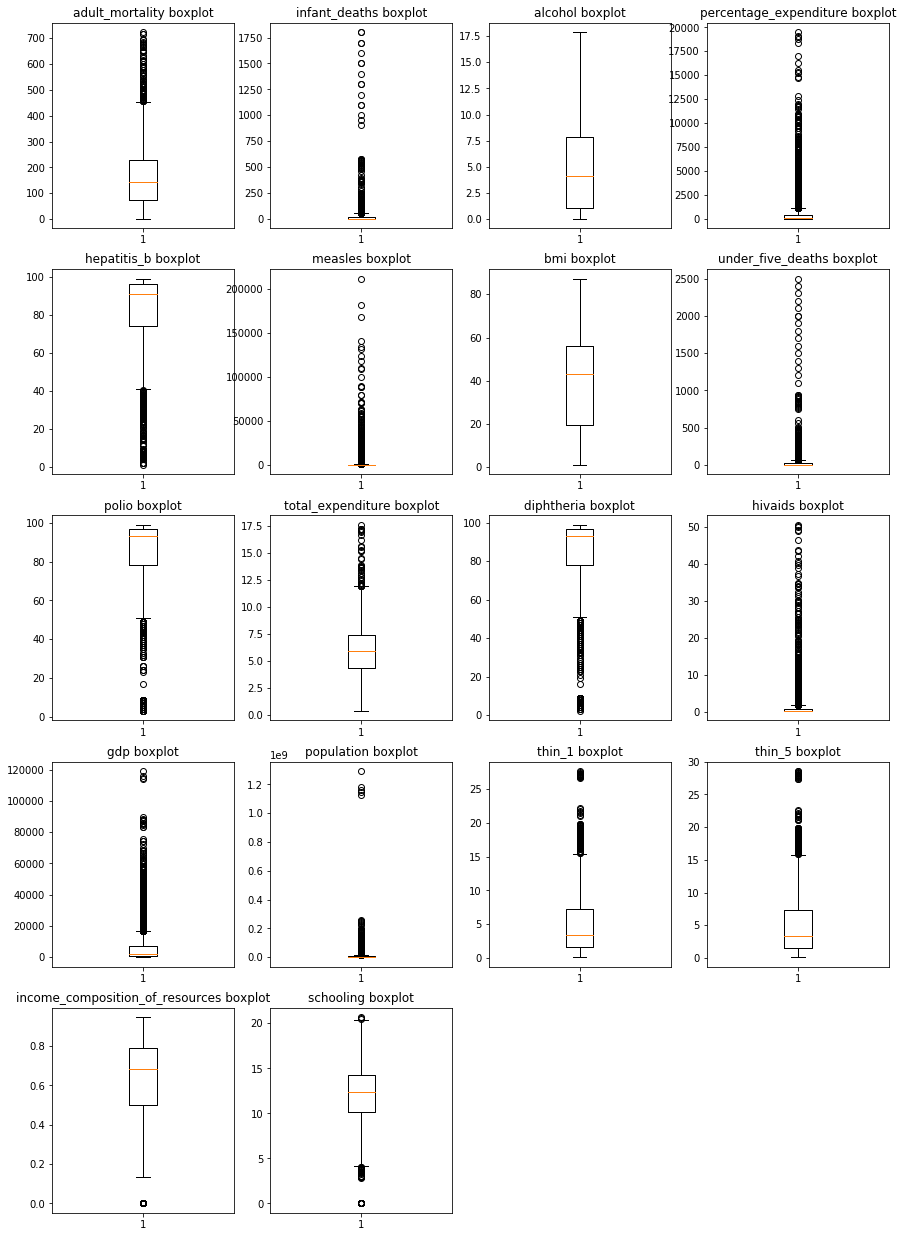

In [14]:
cont_vars = list(data.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
    plt.show()
outliers_visual(data)

<h4>Remove outliers</h4>

In [15]:
data_without_outliers = data.copy()

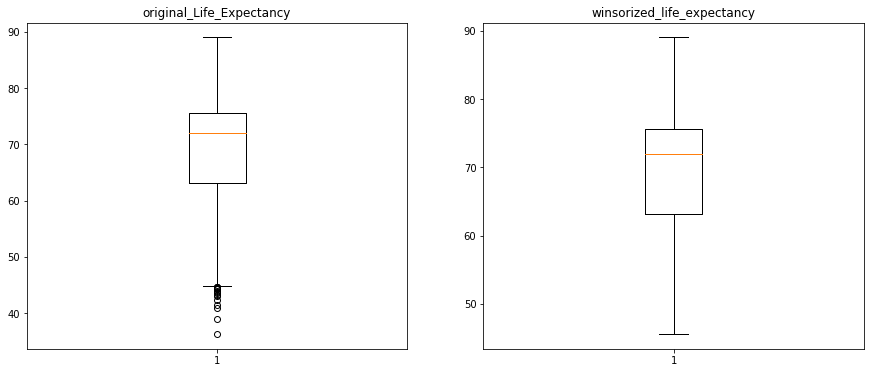

In [16]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
original_life_expectancy = data_without_outliers['life_expectancy']
plt.boxplot(original_life_expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_life_expectancy = winsorize(data_without_outliers['life_expectancy'],(0.01,0))
plt.boxplot(winsorized_life_expectancy)
plt.title("winsorized_life_expectancy")

plt.show()

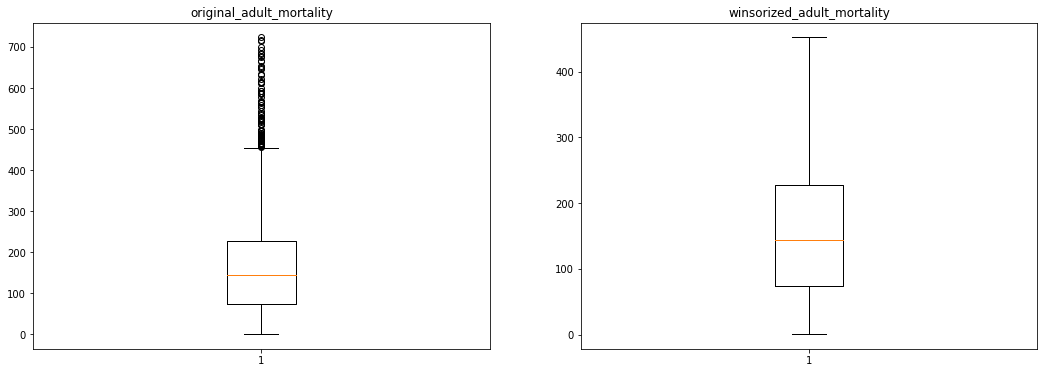

In [17]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_adult_mortality = data_without_outliers['adult_mortality']
plt.boxplot(original_adult_mortality)
plt.title("original_adult_mortality")

plt.subplot(1,2,2)
winsorized_adult_mortality = winsorize(data_without_outliers['adult_mortality'],(0,0.03))
plt.boxplot(winsorized_adult_mortality)
plt.title("winsorized_adult_mortality")

plt.show()

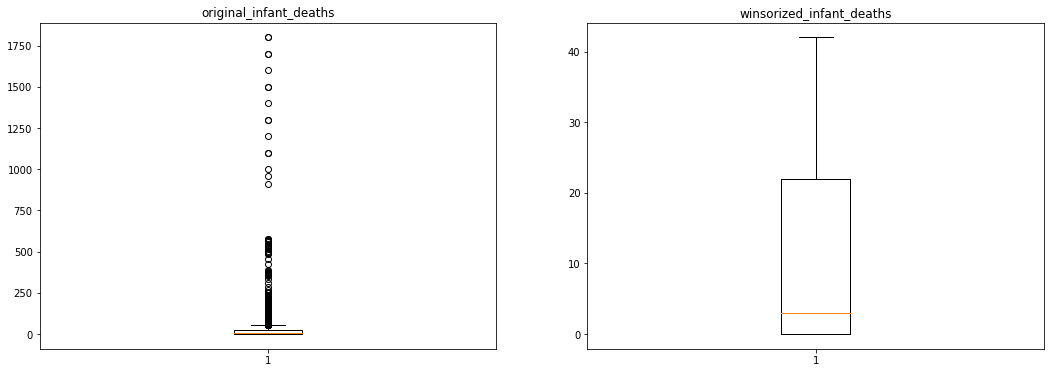

In [18]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_infant_deaths = data_without_outliers['infant_deaths']
plt.boxplot(original_infant_deaths)
plt.title("original_infant_deaths")

plt.subplot(1,2,2)
winsorized_infant_deaths = winsorize(data_without_outliers['infant_deaths'],(0,0.15))
plt.boxplot(winsorized_infant_deaths)
plt.title("winsorized_infant_deaths")

plt.show()

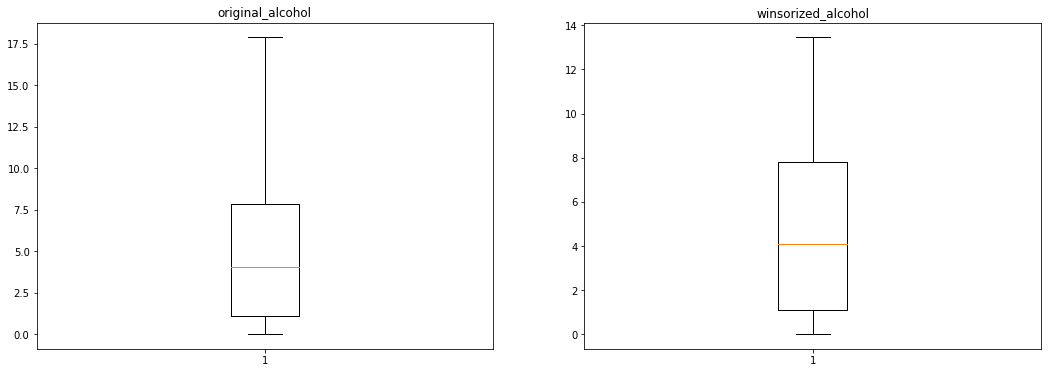

In [19]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_alcohol = data_without_outliers['alcohol']
plt.boxplot(original_alcohol)
plt.title("original_alcohol")

plt.subplot(1,2,2)
winsorized_alcohol = winsorize(data_without_outliers['alcohol'],(0,0.01))
plt.boxplot(winsorized_alcohol)
plt.title("winsorized_alcohol")

plt.show()

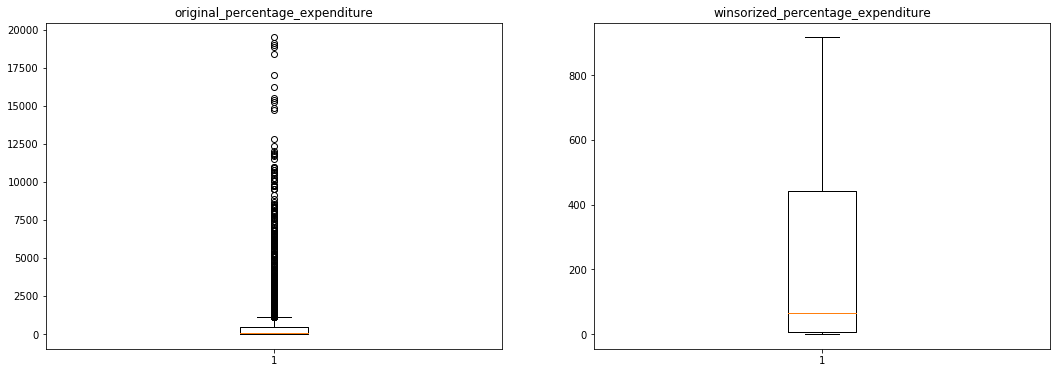

In [20]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_percentage_expenditure = data_without_outliers['percentage_expenditure']
plt.boxplot(original_percentage_expenditure)
plt.title("original_percentage_expenditure")

plt.subplot(1,2,2)
winsorized_percentage_expenditure = winsorize(data_without_outliers['percentage_expenditure'],(0,0.15))
plt.boxplot(winsorized_percentage_expenditure)
plt.title("winsorized_percentage_expenditure")

plt.show()

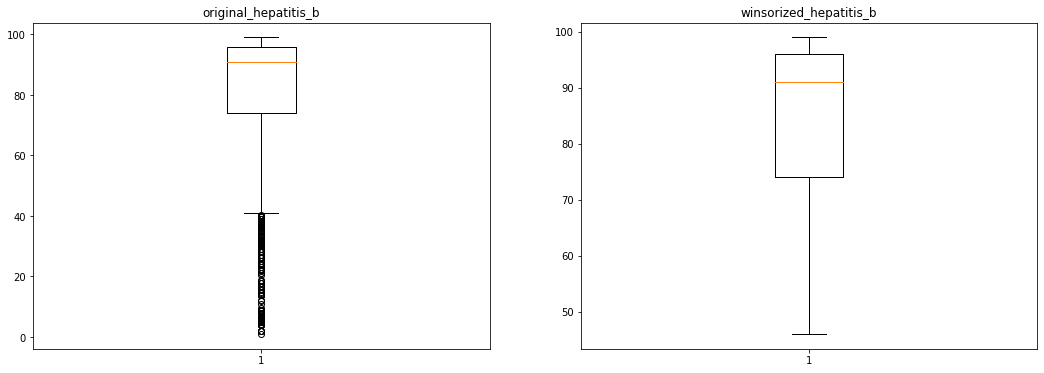

In [21]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_hepatitis_b = data_without_outliers['hepatitis_b']
plt.boxplot(original_hepatitis_b)
plt.title("original_hepatitis_b")

plt.subplot(1,2,2)
winsorized_hepatitis_b = winsorize(data_without_outliers['hepatitis_b'],(0.11,0))
plt.boxplot(winsorized_hepatitis_b)
plt.title("winsorized_hepatitis_b")

plt.show()

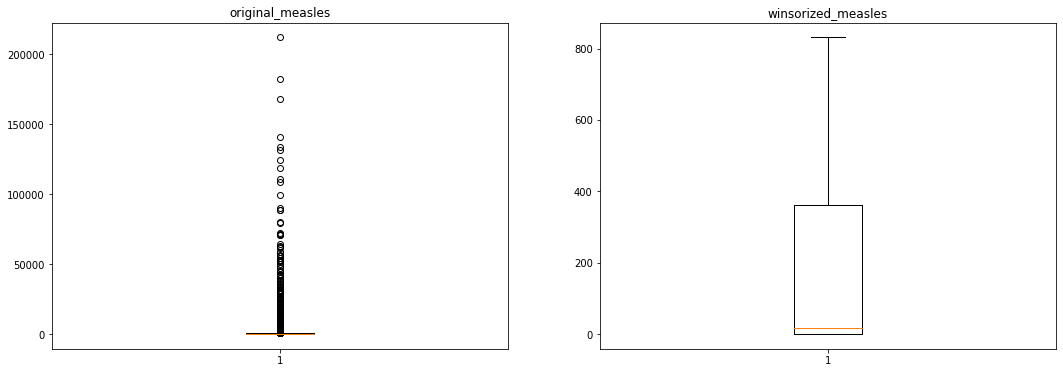

In [22]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_measles = data_without_outliers['measles']
plt.boxplot(original_measles)
plt.title("original_measles")

plt.subplot(1,2,2)
winsorized_measles = winsorize(data_without_outliers['measles'],(0,0.19))
plt.boxplot(winsorized_measles)
plt.title("winsorized_measles")

plt.show()

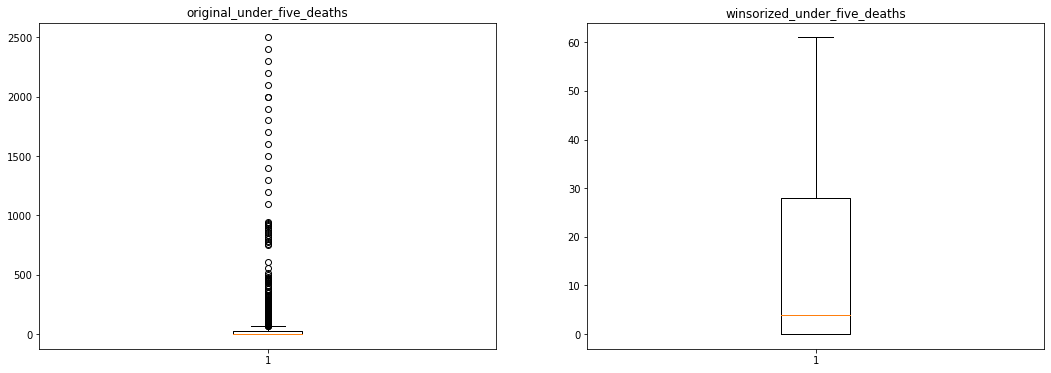

In [23]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_under_five_deaths = data_without_outliers['under_five_deaths']
plt.boxplot(original_under_five_deaths)
plt.title("original_under_five_deaths")

plt.subplot(1,2,2)
winsorized_under_five_deaths = winsorize(data_without_outliers['under_five_deaths'],(0,0.15))
plt.boxplot(winsorized_under_five_deaths)
plt.title("winsorized_under_five_deaths")

plt.show()

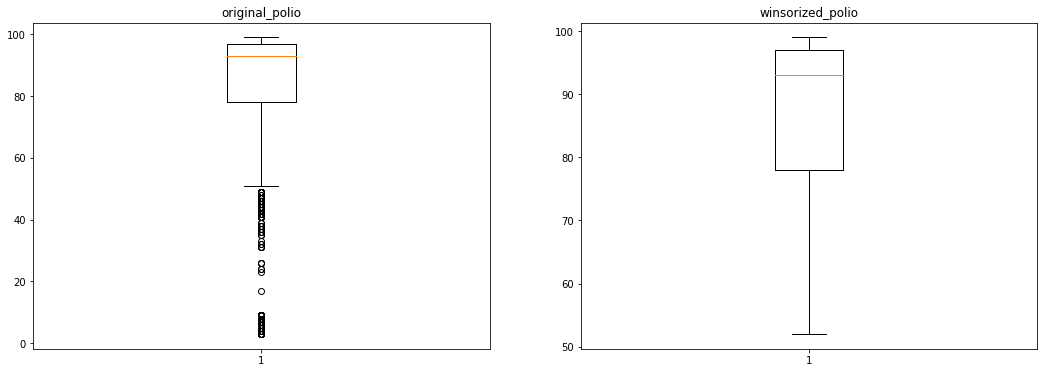

In [24]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_polio = data_without_outliers['polio']
plt.boxplot(original_polio)
plt.title("original_polio")

plt.subplot(1,2,2)
winsorized_polio = winsorize(data_without_outliers['polio'],(0.1,0))
plt.boxplot(winsorized_polio)
plt.title("winsorized_polio")

plt.show()

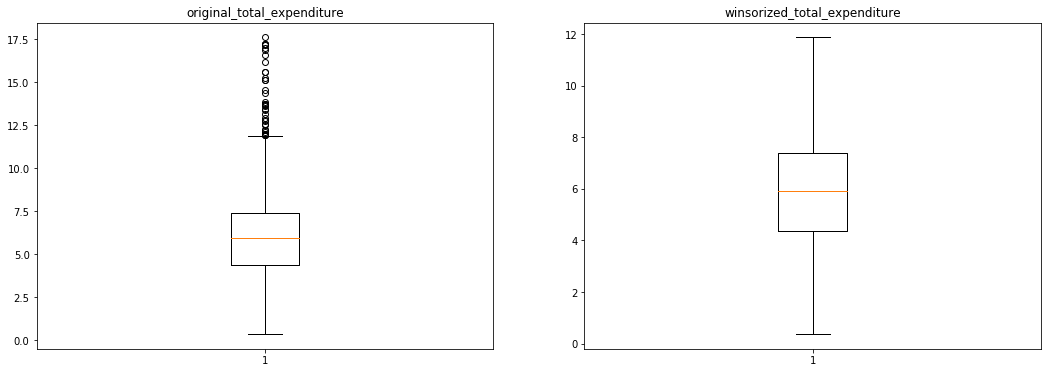

In [25]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_total_expenditure = data_without_outliers['total_expenditure']
plt.boxplot(original_total_expenditure)
plt.title("original_total_expenditure")

plt.subplot(1,2,2)
winsorized_total_expenditure = winsorize(data_without_outliers['total_expenditure'],(0,0.015))
plt.boxplot(winsorized_total_expenditure)
plt.title("winsorized_total_expenditure")

plt.show()

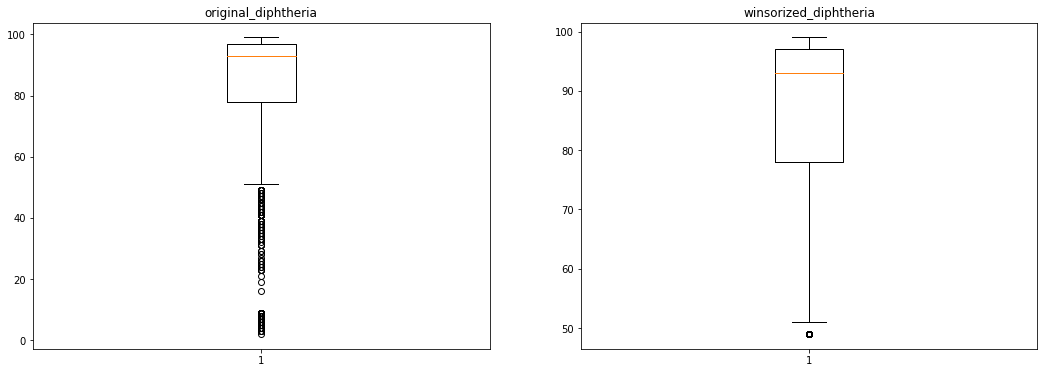

In [26]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_diphtheria = data_without_outliers['diphtheria']
plt.boxplot(original_diphtheria)
plt.title("original_diphtheria")

plt.subplot(1,2,2)
winsorized_diphtheria = winsorize(data_without_outliers['diphtheria'],(0.10,0))
plt.boxplot(winsorized_diphtheria)
plt.title("winsorized_diphtheria")

plt.show()

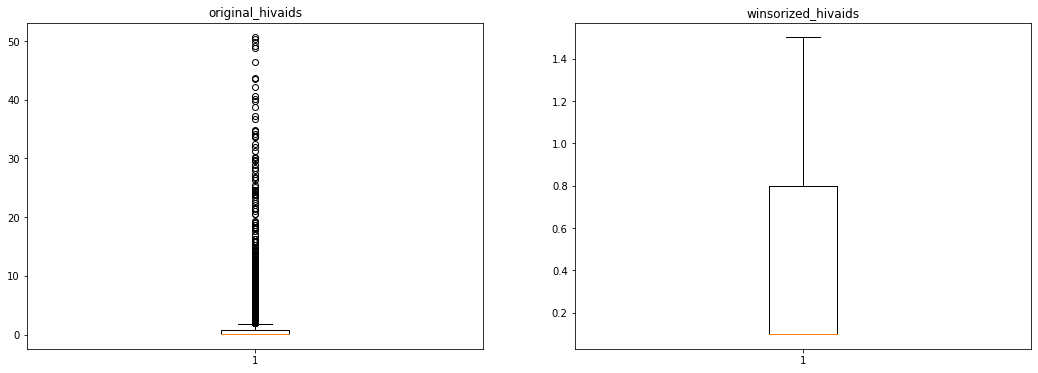

In [27]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_hivaids = data_without_outliers['hivaids']
plt.boxplot(original_hivaids)
plt.title("original_hivaids")

plt.subplot(1,2,2)
winsorized_hivaids = winsorize(data_without_outliers['hivaids'],(0,0.2))
plt.boxplot(winsorized_hivaids)
plt.title("winsorized_hivaids")

plt.show()

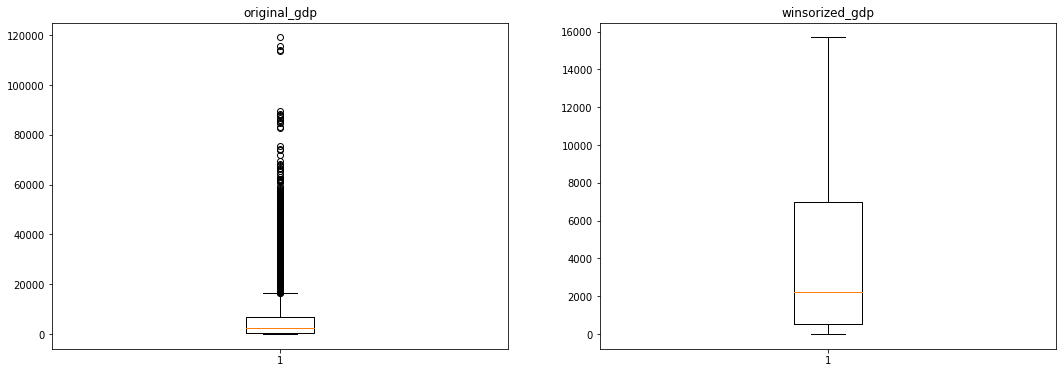

In [28]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_gdp = data_without_outliers['gdp']
plt.boxplot(original_gdp)
plt.title("original_gdp")

plt.subplot(1,2,2)
winsorized_gdp = winsorize(data_without_outliers['gdp'],(0,0.15))
plt.boxplot(winsorized_gdp)
plt.title("winsorized_gdp")

plt.show()

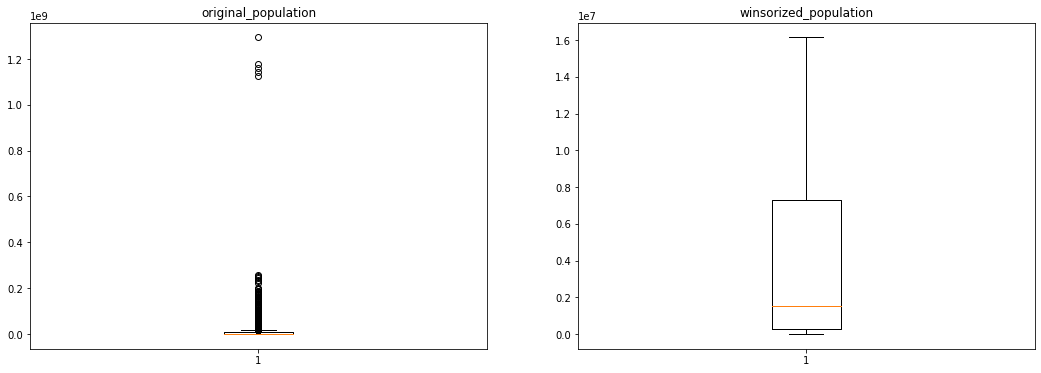

In [29]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_population = data_without_outliers['population']
plt.boxplot(original_population)
plt.title("original_population")

plt.subplot(1,2,2)
winsorized_population = winsorize(data_without_outliers['population'],(0,0.14))
plt.boxplot(winsorized_population)
plt.title("winsorized_population")

plt.show()

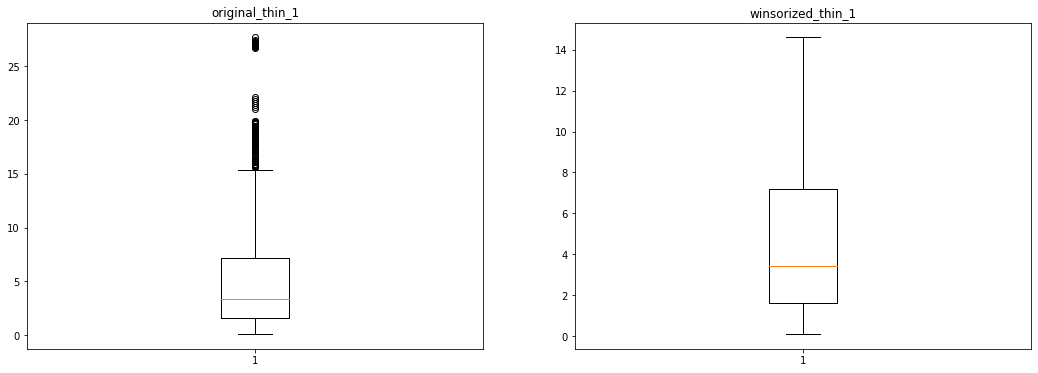

In [30]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thin_1 = data_without_outliers['thin_1']
plt.boxplot(original_thin_1)
plt.title("original_thin_1")

plt.subplot(1,2,2)
winsorized_thin_1 = winsorize(data_without_outliers['thin_1'],(0,0.04))
plt.boxplot(winsorized_thin_1)
plt.title("winsorized_thin_1")

plt.show()

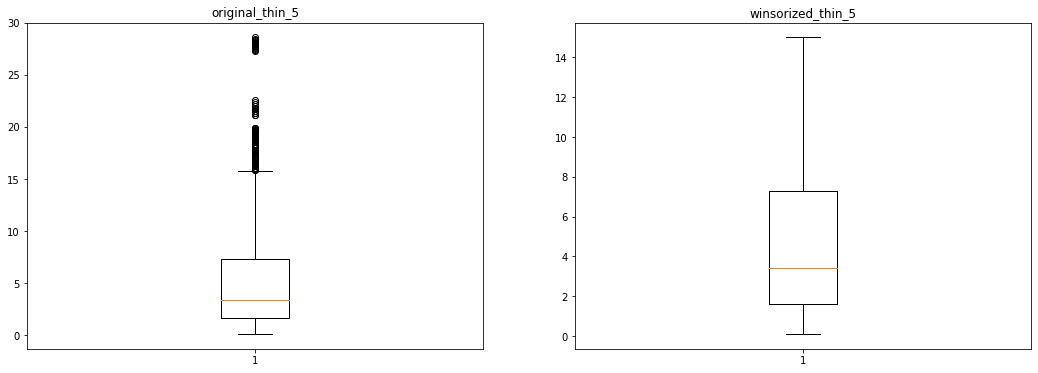

In [31]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thin_5 = data_without_outliers['thin_5']
plt.boxplot(original_thin_5)
plt.title("original_thin_5")

plt.subplot(1,2,2)
winsorized_thin_5 = winsorize(data_without_outliers['thin_5'],(0,0.04))
plt.boxplot(winsorized_thin_5)
plt.title("winsorized_thin_5")

plt.show()

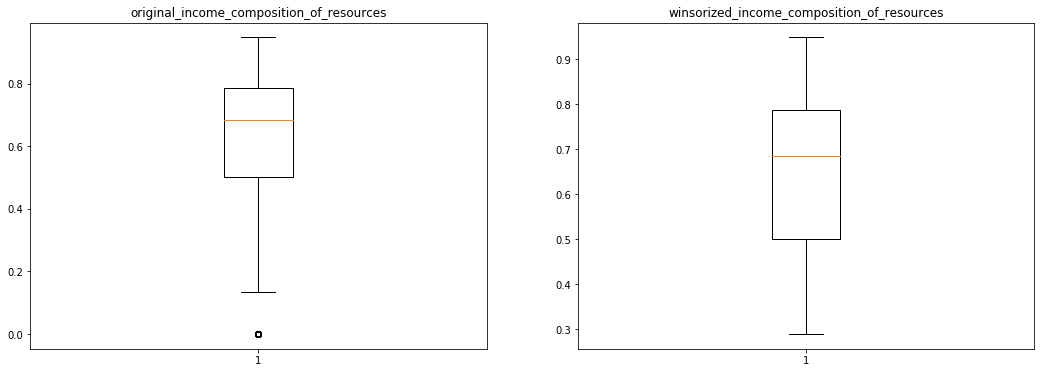

In [32]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_income_composition_of_resources = data_without_outliers['income_composition_of_resources']
plt.boxplot(original_income_composition_of_resources)
plt.title("original_income_composition_of_resources")

plt.subplot(1,2,2)
winsorized_income_composition_of_resources = winsorize(data_without_outliers['income_composition_of_resources'],(0.05,0))
plt.boxplot(winsorized_income_composition_of_resources)
plt.title("winsorized_income_composition_of_resources")

plt.show()

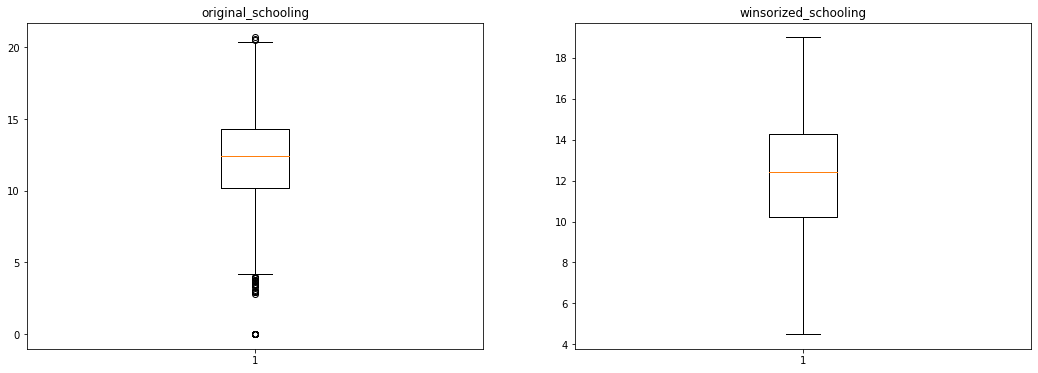

In [33]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_schooling = data_without_outliers['schooling']
plt.boxplot(original_schooling)
plt.title("original_schooling")

plt.subplot(1,2,2)
winsorized_schooling = winsorize(data_without_outliers['schooling'],(0.02,0.01))
plt.boxplot(winsorized_schooling)
plt.title("winsorized_schooling")

plt.show()

In [34]:
data_without_outliers['life_expectancy'] = winsorized_life_expectancy
data_without_outliers['adult_mortality'] = winsorized_adult_mortality
data_without_outliers['infant_deaths'] = winsorized_infant_deaths
data_without_outliers['alcohol'] = winsorized_alcohol
data_without_outliers['percentage_expenditure'] = winsorized_percentage_expenditure
data_without_outliers['hepatitis_b'] = winsorized_hepatitis_b
data_without_outliers['measles'] = winsorized_measles
data_without_outliers['under_five_deaths'] = winsorized_under_five_deaths
data_without_outliers['polio'] = winsorized_polio
data_without_outliers['total_expenditure'] = winsorized_total_expenditure
data_without_outliers['diphtheria'] = winsorized_diphtheria
data_without_outliers['hivaids'] = winsorized_hivaids
data_without_outliers['gdp'] = winsorized_gdp
data_without_outliers['population'] = winsorized_population
data_without_outliers['thin_1'] = winsorized_thin_1
data_without_outliers['thin_5'] = winsorized_thin_5
data_without_outliers['income_composition_of_resources'] = winsorized_income_composition_of_resources
data_without_outliers['schooling'] = winsorized_schooling

In [35]:
data_without_outliers.head(2)

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,polio,total_expenditure,diphtheria,hivaids,gdp,population,thin_1,thin_5,income_composition_of_resources,schooling
0,2015,Developing,65.000,263.000,42,0.010,71.280,65.000,831,19.100,...,52.000,8.160,65.000,0.100,584.259,16148929.000,14.600,15.000,0.479,10.100
1,2014,Developing,59.900,271.000,42,0.010,73.524,62.000,492,18.600,...,58.000,8.180,62.000,0.100,612.697,327582.000,14.600,15.000,0.476,10.000


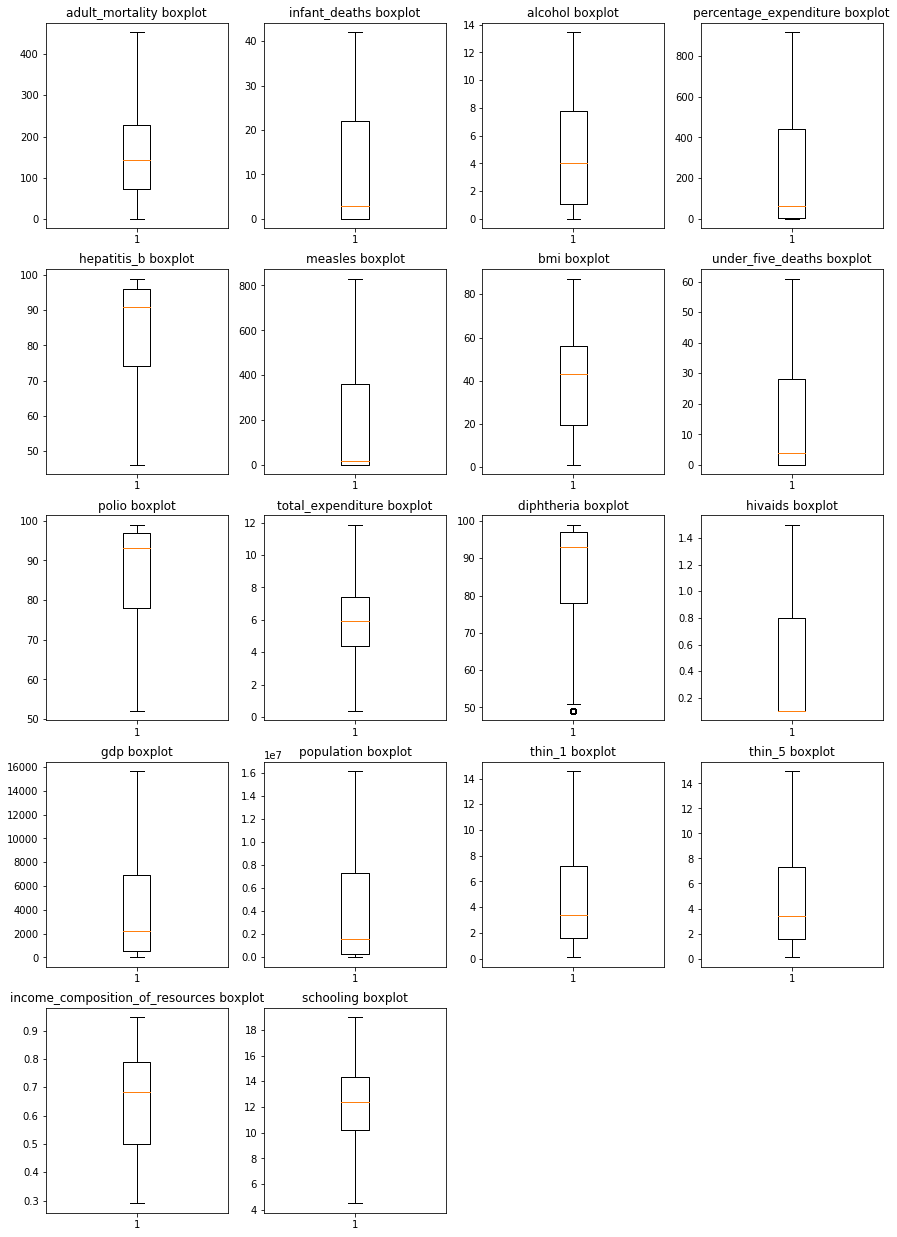

In [36]:
cont_vars = list(data.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
    plt.show()
outliers_visual(data_without_outliers)

<h2>Exploratory Data Analysis</h2>

<h4>Check distribution target variable</h4>

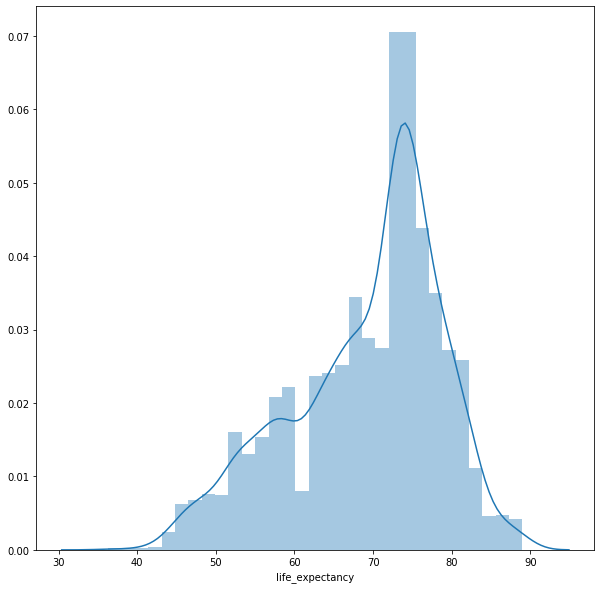

In [37]:
plt.figure(figsize=(10,10))
plt.tight_layout()
sns.distplot(data['life_expectancy'])

From the visualization above, we get the information that average maximum from Life Expectancy (as tagret variable) is in between 70-80 years old.

<h3>Check Assumption : Linearity</h3>

Befor we go through the modelling step, we need to identify linearity relationship between variable predictor (x) with variable target (y). Relationship between 'x' and 'y' can be determined using correlation values. High positif correlation values indicate that there are strong positive relationship between variables. And high negative correlation values indicate that there are strong negatif relationship between variables.<br>

In [38]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [39]:

def linearity(data,target):
    cor_list = []
    for col in data.drop(target, axis = 1).columns:
        if col in data.select_dtypes('category').columns:
            cor_val = spearmanr(data[col], data[target])
        else:
            cor_val = pearsonr(data[col], data[target])
        cor_dict = {"Predictor": col,
                "Correlation": cor_val[0]
               }
        cor_list.append(cor_dict)
        cor_values = pd.DataFrame(cor_list)
    return cor_values

    

In [40]:
linearity(data,'life_expectancy')

,Predictor,Correlation
0,year,0.170
1,status,-0.545
2,adult_mortality,-0.696
3,infant_deaths,-0.197
4,alcohol,0.381
5,percentage_expenditure,0.382
6,hepatitis_b,0.215
7,measles,-0.158
8,bmi,0.555
9,under_five_deaths,-0.222


From table result above, we get the information that 'life_expectancy' (target variable) have strong positive relationship with predictor variable 'schooling' and have strong negative relationship with predictor variable 'adult_mortality'.

<h2>Modelling</h2>

<h3>A. Model 1 : Using original data </h3>

First of all, we need to seperate variable target from variable predictor, create dummy variable for categorical data and split the data into train data and test data. 

In [41]:
X_ = data.drop(["life_expectancy"], axis = 1)
y = data.life_expectancy.values

In [42]:
X = pd.get_dummies(X_, columns = data.select_dtypes('category').columns, drop_first = True)
X.head()

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hivaids,gdp,population,thin_1,thin_5,income_composition_of_resources,schooling,status_Developing
0,2015,263.000,62,0.010,71.280,65.000,1154,19.100,83,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100,1
1,2014,271.000,64,0.010,73.524,62.000,492,18.600,86,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000,1
2,2013,268.000,66,0.010,73.219,64.000,430,18.100,89,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900,1
3,2012,272.000,69,0.010,78.184,67.000,2787,17.600,93,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800,1
4,2011,275.000,71,0.010,7.097,68.000,3013,17.200,97,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500,1


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("y Train:", y_train.shape)
print("y Test:", y_test.shape)


X Train: (2350, 20)
X Test: (588, 20)
y Train: (2350,)
y Test: (588,)


<h4>Modelling using Linear Regression</h4>

In [44]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
predictions = lm.predict(X_test)
pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
pred1 = pred.head(10)
pred1

,Actual,Predicted
0,73.700,67.259
1,75.900,77.118
2,74.200,74.927
3,76.800,77.493
4,51.900,47.455
5,49.600,50.431
6,67.400,67.871
7,73.900,70.722
8,77.200,74.405
9,55.000,54.585


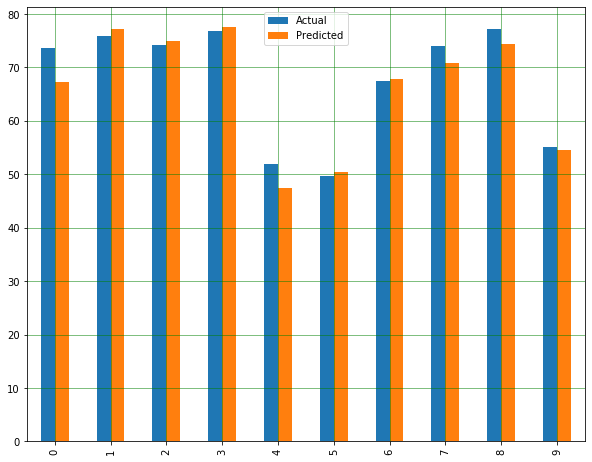

In [46]:
pred1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Table and plot visualization above shown that actual value and prediction value from the model aren't very precise but they have close enough value. For example in the first index, actual value is 73.700, whilst the predicted value is 67.259. 

<h3>Statistic summary from the model</h3>

In [48]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     662.1
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        06:06:47   Log-Likelihood:                -8270.3
No. Observations:                2938   AIC:                         1.658e+04
Df Residuals:                    2917   BIC:                         1.671e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              86.3789     34.743      2.486      0.013      18.255     154.503
year                               -0.0151      0.017     -0.867      0.386      -0.049       0.019
adult_mortality                    -0.0196      0.001    -24.551      0.000      -0.021      -0.018
infant_deaths                       0.0975      0.008     11.581      0.000       0.081       0.114
alcohol                             0.0499      0.025      2.002      0.045       0.001       0.099
percentage_expenditure              0.0003   6.74e-05      4.522      0.000       0.000       0.000
hepatitis_b                        -0.0084      0.004     -2.387      0.017      -0.015      -0.002
measles                         -2.757e-05    7.7e-06     -3.580      0.000   -4.27e-05   -1.25e-05
bmi                                 0.0474      0.005      9.729      0.000       0.038       0.057
under_five_deaths                  -0.0732      0.006    -11.854      0.000      -0.085      -0.061
polio                               0.0256      0.004      5.720      0.000       0.017       0.034
total_expenditure                   0.0338      0.034      0.994      0.320      -0.033       0.100
diphtheria                          0.0409      0.005      8.763      0.000       0.032       0.050
hivaids                            -0.4719      0.018    -26.685      0.000      -0.507      -0.437
gdp                              2.978e-06   9.68e-06      0.308      0.758    -1.6e-05     2.2e-05
population                       1.523e-09   1.65e-09      0.923      0.356   -1.71e-09    4.76e-09
thin_1                             -0.0798      0.050     -1.588      0.112      -0.178       0.019
thin_5                              0.0095      0.049      0.191      0.848      -0.088       0.106
income_composition_of_resources     6.0724      0.636      9.543      0.000       4.825       7.320
schooling                           0.6401      0.041     15.466      0.000       0.559       0.721
status_Developing                  -1.4748      0.271     -5.447      0.000      -2.006      -0.944
==============================================================================
Omnibus:                      133.954   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              362.271
Skew:                          -0.208   Prob(JB):                     2.16e-79
Kurtosis:                       4.669   Cond. No.                     2.60e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+10. This might indicate that there are
strong multicollinearity or

<b>R-Squared and Adj. R-Squared </b> are commonly used for explanatory purpose and explains how well selected independent variables explain the dependent variable. <br>
<b>R-Squared :</b>have some information bias when using R-squared value, because when terms are increase R-Squared value will increases even though the model is not actually improving.<br>
<b>Adj.R-Squared : </b> Bias information from R-squared value can be solved by Adj.R-squared. Value from Adj.R-squared will increase if adding useful terms and will decrease if adding less useful terms.

From the summary above we got a value of <b>0.818</b> for Adj.R-Squared.

<h4>Coefficient Value:</h4><br>
From summary result above, shown information about coefficient values in each variables. 'schooling' variable have a value of 0.604, which mean that for a unit increase in schooling there is a increases of 0.604 units in the life of expectancy. 

<h3>Evaluate model performance 1</h3><br>
This step aims to evaluate whether regression algorithm in this models have a good performance or not. There are three evaluation metrics are commonly used :<br>
<b>1. MAE (Mean Absolute Error) :</b>the average of the absolute difference between the predicted values and observed value.<br>
<b>2. MSE (Mean Squared Error) :</b>the mean of the squared errors .<br>
<b>3. RMSE (Root Mean Squared Error) :</b> sample standard deviation of the differences between predicted values and observed values (called residuals)<br>

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 2.829179854291739
Mean Squared Error: 14.822005464326935
Root Mean Squared Error: 3.849935774052203


<h3>Assumption Check Model 1</h3>

Good model can be determined by less or no Multicolinearity.

<h4>Multicolinearity</h4>Strong correlation between predictor variables, indicated with VIF (variance inflation factor) value > 10.

In [49]:
#gather features
col_dat = data.drop(['life_expectancy'],axis=1)
features = "+".join(col_dat.columns)

In [50]:
y, X = dmatrices('life_expectancy ~' + features, data, return_type='dataframe')

In [51]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [52]:
vif[vif["VIF Factor"]>10]

,VIF Factor,features
0,215833.455,Intercept
4,176.026,infant_deaths
10,175.270,under_five_deaths


From the result above, table shown that there are multicolinearity in infant_deaths and under_five_deaths variables. It is indicate that there are strong relationship between those two variables. Based on the business case and explanation variable above, we can decided whether we need to remove one of variable or tunning the variables by feature engineering.

<h4>Feature Engineering</h4>

<Figure size 360x360 with 0 Axes>

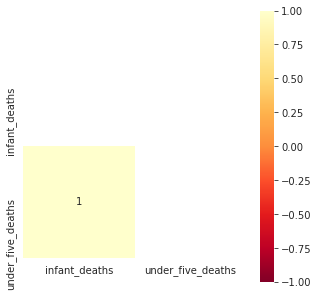

In [69]:
cor_death = data[['infant_deaths','under_five_deaths']]
pd.set_option('precision', 3)
correlation=cor_death.corr(method='pearson')
# heatmap of the correlation 
plt.figure(figsize=(5,5))
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(correlation, mask=mask, square=True,annot=True,vmin=-1,vmax=1,cmap="YlOrRd_r")

Visualization above shown that correlation between infant_death and under_five_deaths is exactly 1. Based on the business case and description variable, it was possibly enough since under five years old are classified in age of infant. So, for feature engineering steps, we can remove one of these variables. 

<h4>Remove under five death variable</h4>

In [53]:
data_new = data.copy()

In [54]:
data_new.columns

Index(['year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hivaids', 'gdp', 'population', 'thin_1', 'thin_5',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [55]:
#1. Drop under_five_death variable
data_new.drop(['under_five_deaths'], axis=1, inplace=True)

<h3>B. Model 2 : without multicolinearity</h3>

After removing multicolinearity, create the second models.

In [56]:
X_new_mod = data_new.drop(["life_expectancy"], axis = 1)
y_new = data_new.life_expectancy.values

In [57]:
X_new = pd.get_dummies(X_new_mod, columns = data_new.select_dtypes('category').columns, drop_first = True)


In [58]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.2, random_state = 42)
print("X Train:", X_train_new.shape)
print("X Test:", X_test_new.shape)
print("y Train:", y_train_new.shape)
print("y Test:", y_test_new.shape)


X Train: (2350, 19)
X Test: (588, 19)
y Train: (2350,)
y Test: (588,)


In [59]:
lm_new = LinearRegression()
lm_new.fit(X_train_new,y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
X_new=sm.add_constant(X_new)
model_new=sm.OLS(y_new,X_new).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     658.1
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        06:06:56   Log-Likelihood:                -8339.4
No. Observations:                2938   AIC:                         1.672e+04
Df Residuals:                    2918   BIC:                         1.684e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              94.0603     35.558      2.645      0.008      24.339     163.781
year                               -0.0195      0.018     -1.098      0.272      -0.054       0.015
adult_mortality                    -0.0200      0.001    -24.505      0.000      -0.022      -0.018
infant_deaths                      -0.0017      0.001     -1.752      0.080      -0.004       0.000
alcohol                             0.0148      0.025      0.584      0.559      -0.035       0.064
percentage_expenditure              0.0003    6.9e-05      4.297      0.000       0.000       0.000
hepatitis_b                        -0.0112      0.004     -3.109      0.002      -0.018      -0.004
measles                         -3.612e-05   7.85e-06     -4.602      0.000   -5.15e-05   -2.07e-05
bmi                                 0.0485      0.005      9.741      0.000       0.039       0.058
polio                               0.0286      0.005      6.252      0.000       0.020       0.038
total_expenditure                   0.0400      0.035      1.152      0.249      -0.028       0.108
diphtheria                          0.0481      0.005     10.154      0.000       0.039       0.057
hivaids                            -0.4846      0.018    -26.817      0.000      -0.520      -0.449
gdp                              1.036e-06   9.91e-06      0.105      0.917   -1.84e-05    2.05e-05
population                       3.826e-09   1.68e-09      2.280      0.023    5.36e-10    7.12e-09
thin_1                             -0.0975      0.051     -1.898      0.058      -0.198       0.003
thin_5                              0.0376      0.051      0.744      0.457      -0.062       0.137
income_composition_of_resources     6.7337      0.649     10.378      0.000       5.461       8.006
schooling                           0.6593      0.042     15.574      0.000       0.576       0.742
status_Developing                  -1.4069      0.277     -5.077      0.000      -1.950      -0.864
==============================================================================
Omnibus:                      135.391   Durbin-Watson:                   0.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              369.769
Skew:                          -0.208   Prob(JB):                     5.08e-81
Kurtosis:                       4.687   Cond. No.                     2.60e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the summary above we got a value of <b>0.810</b> for Adj.R-Squared model 2. This value is close enough with Adj. R-Squared in model 1

<h3>Evaluate model performance 2</h3><br>

In [82]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, predictions_new))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_new, predictions_new))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_new, predictions_new)))

Mean Absolute Error: 2.931863409445781
Mean Squared Error: 15.923368406123336
Root Mean Squared Error: 3.9904095536828468


<h3>Assumption Check Model 2</h3>

<h4>Homoscedasticity</h4><br>
The model assumes that the error term has mean 0 and equal variance at all levels of the independent variables. A scatter plot of residual values vs predicted values is a way to check for homoscedasticity. There should be no pattern in this distribution and have spread of values close enough with 0.

Text(0, 0.5, 'Residual')

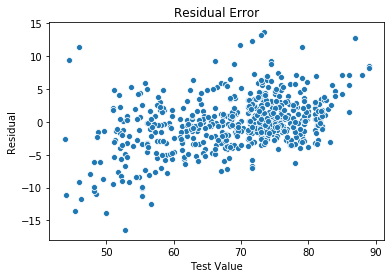

In [70]:
residual = y_test_new - predictions_new
sns.scatterplot(y_test_new,residual)
plt.title('Residual Error')
plt.xlabel('Test Value')
plt.ylabel('Residual')

<h4>Normality</h4>

Normality assume that the error(residuals) follow a normal distribution. To determined whether the residual normally distributed or not, there are several test that might be to consider, one of them is Shapiro Wilk test. Statistical hypotesis for Shapiro Wilk test is :<br>

<b>H0 :</b>Residuals are normally distributed<br>
<b>H1 :</b>Residuals are not normally distributed<br>

If the p-value < 0.05, then the H0 is rejected. If p-value > 0.05, then the H0 failed to reject





In [71]:
from scipy.stats import shapiro

# normality test
stat, p = shapiro(residual)
print("Statistic: {}, p-value: {}".format(stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('p-value > alpha, Fail to reject H0')
else:
    print('p-value < alpha, Reject H0')

Statistic: 0.9781296253204346, p-value: 1.0726191135290719e-07
p-value < alpha, Reject H0


Result above shown that hypotesis null value (H0) is rejected, so the conclusion is Residuals are not normally distributed.

<h3>C. Model 3 : Using data without outliers</h3>

In this third modelling steps, we create new model without outliers to predict whether the outliers affect to our normality of residuals or not.

In [72]:
X_model_new = data_without_outliers.drop(["life_expectancy"], axis = 1)
y_model_3 = data_without_outliers.life_expectancy.values

In [73]:
X_model_3 = pd.get_dummies(X_new_mod, columns = data_without_outliers.select_dtypes('category').columns, drop_first = True)

In [74]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_model_3, y_model_3, test_size = 0.2, random_state = 42)
print("X Train:", X_train_new.shape)
print("X Test:", X_test_new.shape)
print("y Train:", y_train_new.shape)
print("y Test:", y_test_new.shape)

X Train: (2350, 19)
X Test: (588, 19)
y Train: (2350,)
y Test: (588,)


In [75]:
lm_new_3 = LinearRegression()
lm_new_3.fit(X_train_3,y_train_3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
X_model_3=sm.add_constant(X_model_3)
model_new=sm.OLS(y_model_3,X_model_3).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     663.1
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        07:55:00   Log-Likelihood:                -8316.2
No. Observations:                2938   AIC:                         1.667e+04
Df Residuals:                    2918   BIC:                         1.679e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              99.8847     35.278      2.831      0.005      30.713     169.056
year                               -0.0225      0.018     -1.274      0.203      -0.057       0.012
adult_mortality                    -0.0196      0.001    -24.268      0.000      -0.021      -0.018
infant_deaths                      -0.0017      0.001     -1.748      0.081      -0.004       0.000
alcohol                             0.0131      0.025      0.521      0.603      -0.036       0.062
percentage_expenditure              0.0003   6.84e-05      4.343      0.000       0.000       0.000
hepatitis_b                        -0.0105      0.004     -2.920      0.004      -0.017      -0.003
measles                         -3.621e-05   7.79e-06     -4.650      0.000   -5.15e-05   -2.09e-05
bmi                                 0.0485      0.005      9.807      0.000       0.039       0.058
polio                               0.0286      0.005      6.286      0.000       0.020       0.037
total_expenditure                   0.0522      0.034      1.515      0.130      -0.015       0.120
diphtheria                          0.0475      0.005     10.110      0.000       0.038       0.057
hivaids                            -0.4830      0.018    -26.941      0.000      -0.518      -0.448
gdp                              1.243e-06   9.83e-06      0.126      0.899    -1.8e-05    2.05e-05
population                       3.899e-09   1.66e-09      2.342      0.019    6.35e-10    7.16e-09
thin_1                             -0.0983      0.051     -1.929      0.054      -0.198       0.002
thin_5                              0.0364      0.050      0.725      0.468      -0.062       0.135
income_composition_of_resources     6.7310      0.644     10.456      0.000       5.469       7.993
schooling                           0.6594      0.042     15.701      0.000       0.577       0.742
status_Developing                  -1.4058      0.275     -5.114      0.000      -1.945      -0.867
==============================================================================
Omnibus:                       99.065   Durbin-Watson:                   0.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.799
Skew:                          -0.135   Prob(JB):                     6.96e-54
Kurtosis:                       4.388   Cond. No.                     2.60e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the summary above we got a value of <b>0.811</b> for Adj.R-Squared model 1. This value is close enough with Adj. R-Squared in model 1 and model 2.

<h3>Evaluate model performance 3</h3><br>

In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_3, predictions_model_3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_3, predictions_model_3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_3, predictions_model_3)))

Mean Absolute Error: 2.9244354135240695
Mean Squared Error: 15.831132675405156
Root Mean Squared Error: 3.978835592909709


<h3>Assumption Check Model 3</h3>


<h4>Normality</h4>

In [79]:
from scipy.stats import shapiro

residual3 = y_test_3 - predictions_model_3

# normality test
stat, p = shapiro(residual3)
print("Statistic: {}, p-value: {}".format(stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('p-value > alpha, Fail to reject H0')
else:
    print('p-value < alpha, Reject H0')

Statistic: 0.9786660075187683, p-value: 1.4784544077883766e-07
p-value < alpha, Reject H0


Unfortunately, the result above still shown that hypotesis null are rejected. So, outlier is not a factor which affect in un-normally distributed residuals.

<h2>Model Comparison</h2>

In [84]:
comparison = {'Model': ['Model 1 - using original data', 'Model 2 - without multicolinearity', 'Model 3 - without outliers'],\
              'Adj.R-Squared': [0.818, 0.810, 0.811],\
              'RMSE':[3.850,3.990,3.979]}
pd.DataFrame.from_dict(comparison)

,Model,Adj.R-Squared,RMSE
0,Model 1 - using original data,0.818,3.850
1,Model 2 - without multicolinearity,0.810,3.990
2,Model 3 - without outliers,0.811,3.979


A good model can be measure by RMSE or Adj.R-Squared value. Lower value of RMSE indicate better fit of models. From the table result above, Model 1 have the lowest RMSE value, but it's not the good model since Model 1 contains multicolinearity. In linear regression models, multicolinearity must be avoided, since multicolinearity causes coefficients become very sensitive to small changes in the model. So for better modelling in life expectancy data, I suggest you to use Model 3 with data without outliers.

<h2>Conclusion</h2>

From the result above, we can conculde that :
1. Variable income have strong positive linear relationship with life expectancy. From the summary in third models, income have coefficient value equal to 6.731, means that when unit of income increses, there is of increases 6.731 in life expectancy.<br>
2. In model comparison steps, table shown that each models have close enough value in Adj.R-Squared and RMSE. High Adj.R-Squared value means that these three models good enough to predict life expectancy.<br>
3. Only the normality which doesn't meet the assumption checking, means that these residuals in three models are not normally distributed.<br>
4. Model 3 - data without outliers, is the best model to predict life expectancy, since it has low RMSE value and meet multicolinearity, linearity, and homoscedasticity assumption check.

